<a href="https://colab.research.google.com/github/secant78/Crop-Classification-Using-KNN-and-SVM/blob/main/684_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import math
import string
#import data set to list'
import glob
import pandas as pd
import numpy as np


#"/content/drive/My Drive/"
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
fileTrain = r'/content/drive/My Drive/CISC 684/forest_mapping/WinnipegDataset.txt'
#filetrain1 = r'/content/drive/My Drive/CISC 684/forest_mapping/training.csv'
#fileTest = r'/content/drive/My Drive/CISC 684/forest_mapping/testing.csv'

dataTrain = pd.read_csv(fileTrain) #opens the file in read mode

#datatrain1 = pd.read_csv(filetrain1)
#datatest = pd.read_csv(fileTest)
#dataTest = pd.read_csv(fileTest)
 #puts the file into an array
        #words['a'] = words['a'].str.join(" ") 
        #print(words)



#datatrain1 = datatrain1[datatrain1["class"] != "s "]
#datatrain1 = datatrain1[datatrain1["class"] != "d "]

#datatest = datatest[datatest["class"] != "s "]
\
#datatest = datatest[datatest["class"] != "d "]

#datatest.head()
#dataTest.head()

#pcaData = pd.read_csv(filePCA)

In [ ]:
dataTrain

,label,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,...,f135,f136,f137,f138,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166,f167,f168,f169,f170,f171,f172,f173,f174
0,1,-13.55900,-21.4070,-11.40400,-15.24800,-11.92300,-15.29100,-2.15480,-7.8474,-10.0020,0.042390,3.32530,3.36770,0.35631,0.058490,0.58520,0.24150,0.51934,0.23916,-0.62424,-0.81493,-0.70844,-0.65641,-0.195680,-0.63160,0.091945,0.026703,0.005017,0.62019,0.68370,44.369,0.42402,0.196170,0.25967,0.120130,0.054561,0.162260,-11.92300,-12.82300,-21.4070,...,0.13580,0.650770,6711,6143,4570,5064,8212,0.284930,1.7969,1.3442,-0.61941,0.54346,0.42738,0.14683,0.144130,0.58593,0.23712,1.6216,0.23712,294110.0,0.051277,2199.40,92560.0,1.10810,48.444,3.13580,0.57778,2.44440,1.11110,1.8310,0.18519,0.726020,5.3333,6.000000,0.29489,9.77780,2.44440,1.67700,0.20988,0.65422
1,1,-12.80200,-20.3350,-10.39900,-14.13200,-11.09600,-14.36100,-2.40390,-7.5330,-9.9369,0.228420,3.03600,3.26440,0.34295,0.060525,0.59652,0.25249,0.50796,0.23955,-0.57229,-0.74854,-0.64839,-0.62810,-0.188250,-0.55448,0.115710,0.031183,0.006051,0.60356,0.67496,44.992,0.40738,0.196180,0.26758,0.128860,0.052298,0.158260,-11.09600,-11.80500,-20.3350,...,0.30864,0.104830,6274,5084,3297,3777,8214,0.427160,2.4914,1.5420,-0.64500,0.92501,0.64071,0.21322,0.235370,0.75089,0.37003,2.1747,0.37003,412400.0,0.067854,2338.40,100280.0,1.14560,49.778,0.39506,0.46667,1.33330,1.11110,1.2149,0.33333,-0.487510,2.1111,0.098765,0.83333,0.33333,0.33333,0.84869,0.50617,-0.18898
2,1,-12.43100,-19.9020,-10.07400,-13.59800,-10.82900,-14.04800,-2.35660,-7.4717,-9.8283,0.449780,2.76870,3.21850,0.34489,0.061731,0.59338,0.26362,0.49870,0.23768,-0.53347,-0.70253,-0.58846,-0.61836,-0.178040,-0.48642,0.127130,0.032382,0.006162,0.58683,0.68024,45.466,0.39919,0.187640,0.28105,0.132110,0.048473,0.148780,-10.82900,-11.37700,-19.9020,...,0.30864,0.613940,6215,5035,3033,3837,8588,0.478010,2.8315,1.6601,-0.70049,1.03530,0.71699,0.24814,0.260810,0.80946,0.38237,2.2382,0.38237,439570.0,0.117030,3321.30,128320.0,1.26510,49.444,0.24691,0.61111,0.77778,0.77778,1.3689,0.25926,0.252980,2.2222,0.172840,0.68889,0.88889,0.66667,1.27300,0.30864,0.10483
3,1,-12.68900,-19.5290,-10.02800,-13.35000,-11.05600,-14.01400,-2.66110,-6.8396,-9.5006,0.663780,2.29420,2.95800,0.32760,0.067825,0.60457,0.28135,0.47717,0.24148,-0.50405,-0.66998,-0.52543,-0.61169,-0.175070,-0.43576,0.127200,0.031091,0.006040,0.57769,0.67468,46.654,0.38976,0.187930,0.28492,0.137380,0.047480,0.147010,-11.05600,-11.26300,-19.5290,...,0.16049,0.064018,6836,5745,4212,4534,7691,0.292280,1.8260,1.3640,-0.47512,0.65772,0.43840,0.15396,0.144830,0.60147,0.25824,1.6963,0.25824,296240.0,0.036817,1748.10,80640.0,1.07640,50.667,0.88889,0.61111,0.77778,0.77778,1.8892,0.16049,0.437500,4.1111,0.320990,0.83333,0.33333,0.33333,1.14910,0.38272,0.41603
4,1,-12.68600,-19.2780,-9.81850,-13.10800,-10.93200,-13.93900,-2.86750,-6.5919,-9.4594,0.831430,2.17560,3.00700,0.31701,0.069483,0.61351,0.28768,0.47476,0.23756,-0.50314,-0.68221,-0.50731,-0.59134,-0.175050,-0.45195,0.131550,0.031960,0.006439,0.57937,0.66460,46.828,0.38505,0.194320,0.27955,0.141080,0.048950,0.151560,-10.93200,-11.10900,-19.2780,...,0.20988,0.657600,6682,5883,4434,4627,7072,0.229270,1.5949,1.3268,-0.40120,0.52776,0.34389,0.14045,0.091779,0.53551,0.20899,1.5284,0.20899,232610.0,0.021300,1365.40,69540.0,1.04350,51.222,0.39506,0.56667,1.66670,1.00000,1.7351,0.18519,0.350000,4.0000,0.444440,0.68889,0.88889,0.66667,1.58110,0.20988,0.50000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325829,7,2.4823

In [ ]:
dataTrain.isnull().values.any()

False

In [ ]:
from sklearn.model_selection import train_test_split

X = dataTrain.iloc[:,1:].values

y = dataTrain.iloc[:,0].values

#X_train = dataTrain.iloc[:,1:].values

#y_train = dataTrain.iloc[:,0].values

#X_test = datatest.iloc[:,1:].values

#y_test = datatest.iloc[:,0].values

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.0001, random_state=0)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.0002, random_state=0)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.0003, random_state=0)
X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y, test_size=0.00015, random_state=0)
X_train5, X_test5, y_train5, y_test5 = train_test_split(X, y, test_size=0.00025, random_state=0)

print(X_train1.shape)
print(X_test1.shape)

print(X_train2.shape)
print(X_test2.shape)

print(X_train3.shape)
print(X_test3.shape)

print(X_train4.shape)
print(X_test4.shape)

print(X_train5.shape)
print(X_test5.shape)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train1 = sc.fit_transform(X_train1)
X_test1 = sc.transform(X_test1)

X_train2 = sc.fit_transform(X_train2)
X_test2 = sc.transform(X_test2)

X_train3 = sc.fit_transform(X_train3)
X_test3 = sc.transform(X_test3)

X_train4 = sc.fit_transform(X_train4)
X_test4 = sc.transform(X_test4)

X_train5 = sc.fit_transform(X_train5)
X_test5 = sc.transform(X_test5)



(325801, 174)
(33, 174)
(325768, 174)
(66, 174)
(325736, 174)
(98, 174)
(325785, 174)
(49, 174)
(325752, 174)
(82, 174)


In [ ]:
import pandas as pd
setSizeTrain = {'Train Sets':['Set1','Set2','Set3','Set4','Set5'],'Size':[325801, 325785, 325768, 325752, 325736]}   
              #'LDA': [5.263], 'QDA': [2.92397], 'Logistic Regression': [2.92], 'SVM': [0.0351], 'Neural Network':[1.169], 'Classification Tree':[5.85] }
data_set_size_train = pd.DataFrame(setSizeTrain)

In [ ]:
data_set_size_train

,Train Sets,Size
0,Set1,325801
1,Set2,325785
2,Set3,325768
3,Set4,325752
4,Set5,325736


In [ ]:
import pandas as pd
setSize = {'Test Sets':['Set1','Set2','Set3','Set4','Set5'],'Size':[33, 49, 66, 82, 98]}   
              #'LDA': [5.263], 'QDA': [2.92397], 'Logistic Regression': [2.92], 'SVM': [0.0351], 'Neural Network':[1.169], 'Classification Tree':[5.85] }
data_set_size_df = pd.DataFrame(setSize)

In [ ]:
data_set_size_df

,Test Sets,Size
0,Set1,33
1,Set2,49
2,Set3,66
3,Set4,82
4,Set5,98


In [ ]:
y_train

array([6, 6, 5, ..., 4, 3, 6])

In [ ]:
y_train.max()

7

In [ ]:
from math import sqrt

In [ ]:
class KNN:
  def __init__(self,k=1):
        self.k = k
  def predict_test_class(self,NN_df, y_train_):

    y_train_df = pd.DataFrame()
    y_train_df['counter'] = range(y_train_.shape[0])
    y_train_df['y_vals'] = y_train_
  

    y_val_df = pd.merge(y_train_df, NN_df)
  

    max_y_val = y_val_df['y_vals'].mode()
    return max_y_val

  def distance_to_center(self,train,test,y_train_):



    distance = np.zeros((1, train.shape[0]))

    for train_row in range(train.shape[0]):
      distance[0,train_row] = (np.linalg.norm((train[train_row,:] - test[:])))**2


    distance_df = pd.DataFrame()
    distance_df['counter'] = range(distance.shape[1])
    distance_df['dist'] = distance[0,:]

    distance_df = distance_df.sort_values(by=['dist'])


    nearest_neighbors = distance_df.iloc[0:self.k,:]
    predicted_class = self.predict_test_class(nearest_neighbors,y_train_)
  
    return predicted_class
  def get_predictions(self,X_train_,X_test_,y_train_,y_test_):
    
    pred_class = np.zeros((1, X_test_.shape[0]))
    for i in range(X_test_.shape[0]):
      pred_class[0,i] = self.distance_to_center(X_train_,X_test_[i,:],y_train_)
      #print(pred_class)

    return pred_class

  def measure_accuracy(self,predicted, actual):

    nCorrect = 0
    nIncorrect = 0

    for i in range(predicted.shape[1]):
      if(predicted[0,i] == actual[i]):
        nCorrect += 1

      else:
        nIncorrect +=1

    print("Number Correct: ", nCorrect)
    print("Number Incorrect: ", nIncorrect)
    print("Classification Accuracy: ", nCorrect/predicted.shape[1])

    return nCorrect/predicted.shape[1]



In [ ]:
KNN_model = KNN(k=8)

In [ ]:
print(y_train1)
print(y_train1.shape)
print(y_train2.shape)

[6 6 5 ... 4 3 6]
(325801,)
(325768,)


In [ ]:
%%time
predKNN_1 = KNN_model.get_predictions(X_train1,X_test1,y_train1,y_test1)

CPU times: user 1min 26s, sys: 693 ms, total: 1min 27s
Wall time: 1min 27s


In [ ]:
KNN_1_acc = KNN_model.measure_accuracy(predKNN_1,y_test1)

Number Correct:  33
Number Incorrect:  0
Classification Accuracy:  1.0


In [ ]:
%%time
predKNN_2 = KNN_model.get_predictions(X_train2,X_test2,y_train2,y_test2)

CPU times: user 2min 56s, sys: 1.48 s, total: 2min 58s
Wall time: 2min 58s


In [ ]:
knn_acc_2 = KNN_model.measure_accuracy(predKNN_2,y_test2)

Number Correct:  66
Number Incorrect:  0
Classification Accuracy:  1.0


In [ ]:
%%time
predKNN_3 = KNN_model.get_predictions(X_train3,X_test3,y_train3,y_test3)

CPU times: user 4min 22s, sys: 2.3 s, total: 4min 24s
Wall time: 4min 24s


In [ ]:
knn_acc_3 = KNN_model.measure_accuracy(predKNN_3,y_test3)

Number Correct:  98
Number Incorrect:  0
Classification Accuracy:  1.0


In [ ]:
%%time
predKNN_4 = KNN_model.get_predictions(X_train4,X_test4,y_train4,y_test4)

CPU times: user 2min 9s, sys: 1.13 s, total: 2min 11s
Wall time: 2min 11s


In [ ]:
knn_acc_4 = KNN_model.measure_accuracy(predKNN_4,y_test4)

Number Correct:  49
Number Incorrect:  0
Classification Accuracy:  1.0


In [ ]:
%%time
predKNN_5 = KNN_model.get_predictions(X_train5,X_test5,y_train5,y_test5)

CPU times: user 3min 37s, sys: 1.97 s, total: 3min 39s
Wall time: 3min 39s


In [ ]:
knn_acc_5 = KNN_model.measure_accuracy(predKNN_5,y_test5)

Number Correct:  82
Number Incorrect:  0
Classification Accuracy:  1.0


In [ ]:
import pandas as pd
modelsUsedKNN = {'Sets':['Set1','Set2','Set3','Set4','Set5'],'Accuracy':[1, 1, 1, 1, 1]}   
              #'LDA': [5.263], 'QDA': [2.92397], 'Logistic Regression': [2.92], 'SVM': [0.0351], 'Neural Network':[1.169], 'Classification Tree':[5.85] }
acc_KNN_df = pd.DataFrame(modelsUsedKNN)

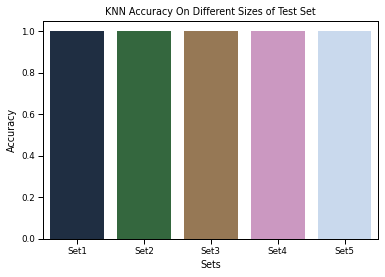

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_context('paper')



# create plot
sns.barplot(x = 'Sets', y = 'Accuracy', data = acc_KNN_df, palette="cubehelix")
plt.title('KNN Accuracy On Different Sizes of Test Set')
plt.show()

In [ ]:
import pandas as pd
modelsUsedTime = {'Sets':['Set1','Set2','Set3','Set4','Set5'],'Time':[87, 131, 178, 219, 264]}   
              #'LDA': [5.263], 'QDA': [2.92397], 'Logistic Regression': [2.92], 'SVM': [0.0351], 'Neural Network':[1.169], 'Classification Tree':[5.85] }
time_KNN_df = pd.DataFrame(modelsUsedTime)

In [ ]:
time_KNN_df

,Sets,Time
0,Set1,87
1,Set2,131
2,Set3,178
3,Set4,219
4,Set5,264


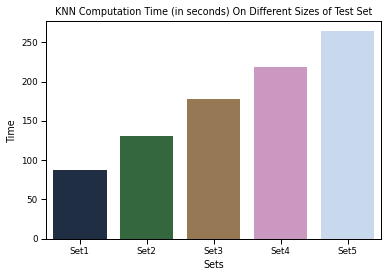

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_context('paper')



# create plot
sns.barplot(x = 'Sets', y = 'Time', data = time_KNN_df, palette="cubehelix")
plt.title('KNN Computation Time (in seconds) On Different Sizes of Test Set')
plt.show()

In [ ]:
knn5_model = KNN(k=5)

In [ ]:
%%time
predKNN5_1 = knn5_model.get_predictions(X_train1,X_test1,y_train1,y_test1)

CPU times: user 1min 26s, sys: 789 ms, total: 1min 27s
Wall time: 1min 27s


In [ ]:
%%time
predKNN5_2 = knn5_model.get_predictions(X_train2,X_test2,y_train2,y_test2)

In [ ]:
%%time
predKNN5_3 = knn5_model.get_predictions(X_train3,X_test3,y_train3,y_test3)

In [ ]:
%%time
predKNN5_4 = knn5_model.get_predictions(X_train4,X_test4,y_train4,y_test4)

In [ ]:
%%time
predKNN5_5 = knn5_model.get_predictions(X_train5,X_test5,y_train5,y_test5)

In [ ]:
X_test.shape

(33, 174)

In [ ]:
accuracy_KNN = KNN_model.measure_accuracy(pred,y_test)
print(accuracy_KNN)

1.0


In [ ]:
class SVM:
    def __init__(self,learning_rate = .001,lamb = .01, max_iter=10000):
        self.learning_rate = learning_rate
        self.lamb = lamb
        self.max_iter = int(max_iter)
        
    
    def initialize(self, X_tr):
        self.X_train = X_tr
        self.X_train_shape = X_tr.shape
        self.b = 0
        self.epochs = 1
        self.weights = np.zeros(self.X_train.shape[1])
        
        

    def fit(self, X_tr, y_train):
        self.initialize(X_tr)


        epoch_iter = self.epochs
        while(epoch_iter < self.max_iter):
          y = np.dot(self.X_train, self.weights)
          prod = y * y_train
          #print(prod.shape)
          for val in range(len(prod)):
            if(prod[val] >=1):
              cost = 0
              self.weights -= self.learning_rate*2*(1/epoch_iter)*self.weights
          #print(weights)
            else:
              cost = 1 - val
              self.weights = self.weights - self.learning_rate * (-2*(1/epoch_iter)*self.weights - np.dot(self.X_train[val],y_train[val]))
              self.b -= self.learning_rate * y_train[val]

              epoch_iter +=1

       

    def predict(self, X_test):
        y_pred = np.dot(self.weights, X_test.T)
        predicted_class = np.zeros(len(y_pred))
        for index, val in enumerate(y_pred):
          if(val > 0):
            predicted_class[index] = 1
          else:
            predicted_class[index] = 0

        return predicted_class
      
    def score(self, predicted, y_test):

        nCorrect = 0
        nIncorrect = 0

        for i in range(len(predicted)):
          if(predicted[i] == y_test[i]):
            nCorrect += 1

          else:
            nIncorrect +=1

        print("Number Correct: ", nCorrect)
        print("Number Incorrect: ", nIncorrect)
        print("Classification Accuracy: ", nCorrect/len(predicted))

        return nCorrect/len(predicted)


        

In [ ]:

import copy

def oneVsRestClassifier(SVM_mod, y_train,y_test,X_train,X_test):

  num_classes = np.max(y_train) + 1
  accuracy_arr = np.zeros(num_classes)
  for i in range(num_classes):
    #print ('\nThe %d/%dth svm classifier training...' % (i+1, num_classes))
    
    y_train_svm = copy.deepcopy(y_train)
    y_test_svm = copy.deepcopy(y_test)
    idxs_i = y_train_svm == i
    idxs_i_test = y_test_svm == i
    #print(idxs_i)
    #print(y_train)
    #print(y_train_svm)
    y_train_svm[idxs_i] = 1
    y_train_svm[~idxs_i] = 0
    #print(y_train_svm)
    y_test_svm[idxs_i_test] = 1
    y_test_svm[~idxs_i_test] = 0
    #logistic = Logistic()
    #loss = logistic.train(X_train, y_train_logistic, method='sgd', batch_size=200, learning_rate=1e-6,
    #          reg = 1e3, num_iters=1000, verbose=True, vectorized=True)
    #losses.append(loss)
    #svm_classifiers.append(svm_2(X_train,X_test,y_train_svm))

    SVM_mod.fit(X_train,y_train_svm)
    y_pred = SVM_mod.predict(X_test)
    #weights, b= svm_2(X_train,X_test,y_train_svm)
    #print(weights)
    #pred_class = predict_svm(weights, X_test)
    #print(pred_class)
    class_acc = SVM_mod.score(y_pred, y_test_svm)
    #print(class_acc)
    accuracy_arr[i] = class_acc
  acc_mean = np.mean(accuracy_arr)
  
  return acc_mean


In [ ]:
SVM_model1 = SVM(max_iter=10)

In [ ]:
%%time

accuracy_SVM1 = oneVsRestClassifier(SVM_model1,y_train1,y_test1,X_train1,X_test1)
print('Accuracy 1: ', accuracy_SVM1)

Number Correct:  33
Number Incorrect:  0
Classification Accuracy:  1.0
Number Correct:  26
Number Incorrect:  7
Classification Accuracy:  0.7878787878787878
Number Correct:  21
Number Incorrect:  12
Classification Accuracy:  0.6363636363636364
Number Correct:  26
Number Incorrect:  7
Classification Accuracy:  0.7878787878787878
Number Correct:  28
Number Incorrect:  5
Classification Accuracy:  0.8484848484848485
Number Correct:  20
Number Incorrect:  13
Classification Accuracy:  0.6060606060606061
Number Correct:  25
Number Incorrect:  8
Classification Accuracy:  0.7575757575757576
Number Correct:  20
Number Incorrect:  13
Classification Accuracy:  0.6060606060606061
Accuracy 1:  0.7537878787878788
CPU times: user 30.9 s, sys: 1.1 s, total: 32 s
Wall time: 30.5 s


In [ ]:
%%time

accuracy_SVM2 = oneVsRestClassifier(SVM_model1,y_train2,y_test2,X_train2,X_test2)
print('Accuracy 2: ', accuracy_SVM2)

Number Correct:  66
Number Incorrect:  0
Classification Accuracy:  1.0
Number Correct:  50
Number Incorrect:  16
Classification Accuracy:  0.7575757575757576
Number Correct:  40
Number Incorrect:  26
Classification Accuracy:  0.6060606060606061
Number Correct:  55
Number Incorrect:  11
Classification Accuracy:  0.8333333333333334
Number Correct:  52
Number Incorrect:  14
Classification Accuracy:  0.7878787878787878
Number Correct:  39
Number Incorrect:  27
Classification Accuracy:  0.5909090909090909
Number Correct:  52
Number Incorrect:  14
Classification Accuracy:  0.7878787878787878
Number Correct:  40
Number Incorrect:  26
Classification Accuracy:  0.6060606060606061
Accuracy 2:  0.7462121212121213
CPU times: user 30.6 s, sys: 1.1 s, total: 31.7 s
Wall time: 30.2 s


In [ ]:
%%time

accuracy_SVM3 = oneVsRestClassifier(SVM_model1,y_train3,y_test3,X_train3,X_test3)
print('Accuracy 3: ', accuracy_SVM3)

Number Correct:  98
Number Incorrect:  0
Classification Accuracy:  1.0
Number Correct:  74
Number Incorrect:  24
Classification Accuracy:  0.7551020408163265
Number Correct:  58
Number Incorrect:  40
Classification Accuracy:  0.5918367346938775
Number Correct:  82
Number Incorrect:  16
Classification Accuracy:  0.8367346938775511
Number Correct:  78
Number Incorrect:  20
Classification Accuracy:  0.7959183673469388
Number Correct:  61
Number Incorrect:  37
Classification Accuracy:  0.6224489795918368
Number Correct:  73
Number Incorrect:  25
Classification Accuracy:  0.7448979591836735
Number Correct:  58
Number Incorrect:  40
Classification Accuracy:  0.5918367346938775
Accuracy 3:  0.7423469387755102
CPU times: user 30.4 s, sys: 1.05 s, total: 31.5 s
Wall time: 30.1 s


In [ ]:
%%time

accuracy_SVM4 = oneVsRestClassifier(SVM_model1,y_train4,y_test4,X_train4,X_test4)
print('Accuracy 4: ', accuracy_SVM4)

Number Correct:  49
Number Incorrect:  0
Classification Accuracy:  1.0
Number Correct:  39
Number Incorrect:  10
Classification Accuracy:  0.7959183673469388
Number Correct:  31
Number Incorrect:  18
Classification Accuracy:  0.6326530612244898
Number Correct:  40
Number Incorrect:  9
Classification Accuracy:  0.8163265306122449
Number Correct:  40
Number Incorrect:  9
Classification Accuracy:  0.8163265306122449
Number Correct:  27
Number Incorrect:  22
Classification Accuracy:  0.5510204081632653
Number Correct:  37
Number Incorrect:  12
Classification Accuracy:  0.7551020408163265
Number Correct:  31
Number Incorrect:  18
Classification Accuracy:  0.6326530612244898
Accuracy 4:  0.75
CPU times: user 30.5 s, sys: 1.02 s, total: 31.5 s
Wall time: 30.2 s


In [ ]:
%%time

accuracy_SVM5 = oneVsRestClassifier(SVM_model1,y_train5,y_test5,X_train5,X_test5)
print('Accuracy 5: ', accuracy_SVM5)

Number Correct:  82
Number Incorrect:  0
Classification Accuracy:  1.0
Number Correct:  61
Number Incorrect:  21
Classification Accuracy:  0.7439024390243902
Number Correct:  48
Number Incorrect:  34
Classification Accuracy:  0.5853658536585366
Number Correct:  67
Number Incorrect:  15
Classification Accuracy:  0.8170731707317073
Number Correct:  64
Number Incorrect:  18
Classification Accuracy:  0.7804878048780488
Number Correct:  51
Number Incorrect:  31
Classification Accuracy:  0.6219512195121951
Number Correct:  63
Number Incorrect:  19
Classification Accuracy:  0.7682926829268293
Number Correct:  47
Number Incorrect:  35
Classification Accuracy:  0.573170731707317
Accuracy 5:  0.7362804878048781
CPU times: user 30.5 s, sys: 1.04 s, total: 31.6 s
Wall time: 30.2 s


In [ ]:
import pandas as pd
modelsUsed = {'Sets':['Set1','Set2','Set3','Set4','Set5'],'Accuracy':[.754, .746, .742, .75, .736]}   
              #'LDA': [5.263], 'QDA': [2.92397], 'Logistic Regression': [2.92], 'SVM': [0.0351], 'Neural Network':[1.169], 'Classification Tree':[5.85] }
acc_svm_df = pd.DataFrame(modelsUsed)

In [ ]:
acc_svm_df

,Sets,Accuracy
0,Set1,0.754
1,Set2,0.746
2,Set3,0.742
3,Set4,0.750
4,Set5,0.736


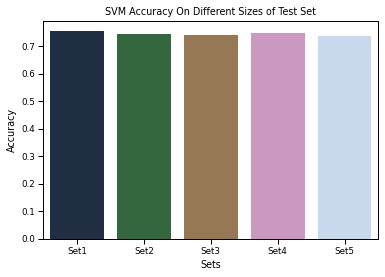

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_context('paper')



# create plot
sns.barplot(x = 'Sets', y = 'Accuracy', data = acc_svm_df, palette="cubehelix")
plt.title('SVM Accuracy On Different Sizes of Test Set')
plt.show()

In [ ]:
import pandas as pd
modelsUsedTime = {'Sets':['Set1','Set2','Set3','Set4','Set5'],'Time':[31.3, 31, 32.2, 32.1, 30.8]}   
              #'LDA': [5.263], 'QDA': [2.92397], 'Logistic Regression': [2.92], 'SVM': [0.0351], 'Neural Network':[1.169], 'Classification Tree':[5.85] }
time_svm_df = pd.DataFrame(modelsUsedTime)

In [ ]:
time_svm_df

,Sets,Time
0,Set1,31.3
1,Set2,31.0
2,Set3,32.2
3,Set4,32.1
4,Set5,30.8


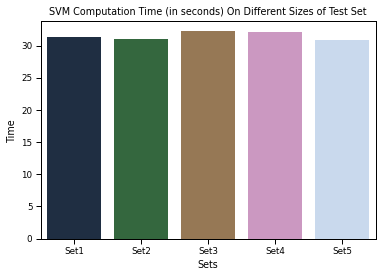

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_context('paper')



# create plot
sns.barplot(x = 'Sets', y = 'Time', data = time_svm_df, palette="cubehelix")
plt.title('SVM Computation Time (in seconds) On Different Sizes of Test Set')
plt.show()

In [ ]:
SVM_model2 = SVM(learning_rate = .01,lamb = .1, max_iter = 10)

In [ ]:
%%time

accuracy_SVM1_model2 = oneVsRestClassifier(SVM_model2,y_train1,y_test1,X_train1,X_test1)
print('Accuracy 1: ', accuracy_SVM1_model2)

Number Correct:  33
Number Incorrect:  0
Classification Accuracy:  1.0
Number Correct:  26
Number Incorrect:  7
Classification Accuracy:  0.7878787878787878
Number Correct:  21
Number Incorrect:  12
Classification Accuracy:  0.6363636363636364
Number Correct:  26
Number Incorrect:  7
Classification Accuracy:  0.7878787878787878
Number Correct:  28
Number Incorrect:  5
Classification Accuracy:  0.8484848484848485
Number Correct:  20
Number Incorrect:  13
Classification Accuracy:  0.6060606060606061
Number Correct:  25
Number Incorrect:  8
Classification Accuracy:  0.7575757575757576
Number Correct:  20
Number Incorrect:  13
Classification Accuracy:  0.6060606060606061
Accuracy 1:  0.7537878787878788
CPU times: user 30.8 s, sys: 1.02 s, total: 31.8 s
Wall time: 30.4 s


In [ ]:
%%time

accuracy_SVM2_model2 = oneVsRestClassifier(SVM_model2,y_train2,y_test2,X_train2,X_test2)
print('Accuracy 2: ', accuracy_SVM2_model2)

Number Correct:  66
Number Incorrect:  0
Classification Accuracy:  1.0
Number Correct:  50
Number Incorrect:  16
Classification Accuracy:  0.7575757575757576
Number Correct:  40
Number Incorrect:  26
Classification Accuracy:  0.6060606060606061
Number Correct:  55
Number Incorrect:  11
Classification Accuracy:  0.8333333333333334
Number Correct:  52
Number Incorrect:  14
Classification Accuracy:  0.7878787878787878
Number Correct:  39
Number Incorrect:  27
Classification Accuracy:  0.5909090909090909
Number Correct:  52
Number Incorrect:  14
Classification Accuracy:  0.7878787878787878
Number Correct:  40
Number Incorrect:  26
Classification Accuracy:  0.6060606060606061
Accuracy 2:  0.7462121212121213
CPU times: user 31 s, sys: 1.11 s, total: 32.1 s
Wall time: 30.6 s


In [ ]:
%%time

accuracy_SVM3_model2 = oneVsRestClassifier(SVM_model2,y_train3,y_test3,X_train3,X_test3)
print('Accuracy 3: ', accuracy_SVM3_model2)

Number Correct:  98
Number Incorrect:  0
Classification Accuracy:  1.0
Number Correct:  74
Number Incorrect:  24
Classification Accuracy:  0.7551020408163265
Number Correct:  58
Number Incorrect:  40
Classification Accuracy:  0.5918367346938775
Number Correct:  82
Number Incorrect:  16
Classification Accuracy:  0.8367346938775511
Number Correct:  78
Number Incorrect:  20
Classification Accuracy:  0.7959183673469388
Number Correct:  61
Number Incorrect:  37
Classification Accuracy:  0.6224489795918368
Number Correct:  73
Number Incorrect:  25
Classification Accuracy:  0.7448979591836735
Number Correct:  58
Number Incorrect:  40
Classification Accuracy:  0.5918367346938775
Accuracy 3:  0.7423469387755102
CPU times: user 30.7 s, sys: 1.1 s, total: 31.8 s
Wall time: 30.3 s


In [ ]:
%%time

accuracy_SVM4_model2 = oneVsRestClassifier(SVM_model2, y_train4,y_test4,X_train4,X_test4)
print('Accuracy 4: ', accuracy_SVM4_model2)

Number Correct:  49
Number Incorrect:  0
Classification Accuracy:  1.0
Number Correct:  39
Number Incorrect:  10
Classification Accuracy:  0.7959183673469388
Number Correct:  31
Number Incorrect:  18
Classification Accuracy:  0.6326530612244898
Number Correct:  40
Number Incorrect:  9
Classification Accuracy:  0.8163265306122449
Number Correct:  40
Number Incorrect:  9
Classification Accuracy:  0.8163265306122449
Number Correct:  27
Number Incorrect:  22
Classification Accuracy:  0.5510204081632653
Number Correct:  37
Number Incorrect:  12
Classification Accuracy:  0.7551020408163265
Number Correct:  31
Number Incorrect:  18
Classification Accuracy:  0.6326530612244898
Accuracy 4:  0.75
CPU times: user 30.8 s, sys: 1.14 s, total: 32 s
Wall time: 30.4 s


In [ ]:
%%time

accuracy_SVM5_model2 = oneVsRestClassifier(SVM_model2, y_train5,y_test5,X_train5,X_test5)
print('Accuracy 5: ', accuracy_SVM5_model2)

Number Correct:  82
Number Incorrect:  0
Classification Accuracy:  1.0
Number Correct:  61
Number Incorrect:  21
Classification Accuracy:  0.7439024390243902
Number Correct:  48
Number Incorrect:  34
Classification Accuracy:  0.5853658536585366
Number Correct:  67
Number Incorrect:  15
Classification Accuracy:  0.8170731707317073
Number Correct:  64
Number Incorrect:  18
Classification Accuracy:  0.7804878048780488
Number Correct:  51
Number Incorrect:  31
Classification Accuracy:  0.6219512195121951
Number Correct:  63
Number Incorrect:  19
Classification Accuracy:  0.7682926829268293
Number Correct:  47
Number Incorrect:  35
Classification Accuracy:  0.573170731707317
Accuracy 5:  0.7362804878048781
CPU times: user 30.6 s, sys: 1.01 s, total: 31.6 s
Wall time: 30.3 s
